In [1]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data File - https://drive.google.com/file/d/1b3ZtbqWw0knl7yJKHrHYuflLpJewHfM6/view?usp=drive_link

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnigns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, classification_report, roc_auc_score, roc_curve


In [3]:
# data import'
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/bank.csv')
data.shape

(11162, 17)

In [4]:
# data sample
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Data Dictionary

In [5]:
# 1. age (numeric).
# 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
# 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
# 4. education (categorical: "unknown","secondary","primary","tertiary").
# 5. default: has credit in default? (binary: "yes","no").
# 6. balance: average yearly balance, in euros (numeric) .
# 7. housing: has housing loan? (binary: "yes","no").
# 8. loan: has personal loan? (binary: "yes","no")

# Related with the last contact of the current campaign:
# 9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
# 10. day: last contact day of the month (numeric).
# 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
# 12. duration: last contact duration, in seconds (numeric).
# 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
# 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
# 15. previous: number of contacts performed before this campaign and for this client (numeric).
# 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

##-- ** TARGET ** --
# 17. deposit - has the client subscribed a term deposit? (binary: "yes","no")./

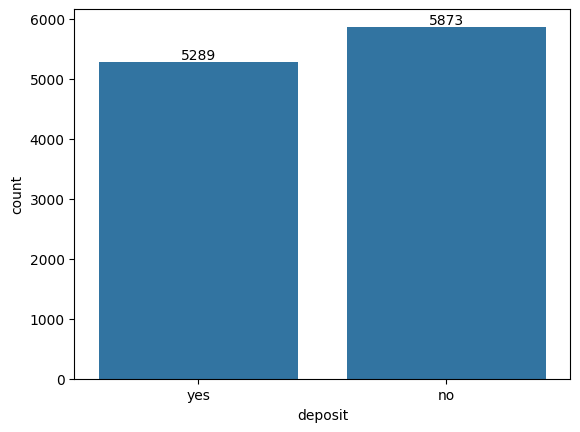

,proportion
deposit,
no,52.62
yes,47.38


In [6]:
# Analyse the target column
ax=sns.countplot(x=data['deposit'])
ax.bar_label(ax.containers[0])
plt.show()


round(data['deposit'].value_counts(normalize=True)*100,2)

In [7]:
# null value
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [8]:
# data type
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [9]:
# number of unique values in each categorical columns
for cols in data.columns:
  if data[cols].dtype == 'O':
    print(cols, ':' , data[cols].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
deposit : 2


Prepare the data for ML model

In [10]:
# label encoding

encoder = LabelEncoder()
for cols in data.columns:
  if data[cols].dtype == 'O':
    data[cols] = encoder.fit_transform(data[cols])

In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [12]:
# dependent and independent split
x = data.drop(['deposit'],axis = 1)
y = data['deposit']

# train test split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state = 42)

In [13]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(7813, 16) (7813,)
(3349, 16) (3349,)


In [14]:
# No need of data scaling because the decision tree uses gini index for comparision of columns
    # range of gini index is always 0 to 1 for any column with any scale / unit

In [15]:
# decision tree model

model = DecisionTreeClassifier(max_depth=8,random_state=42)
model.fit(x_train,y_train)
train_score=model.score(x_train, y_train)
print('Training_Score' ,':' , round(train_score*100,2),'%')

Training_Score : 85.15 %


In [16]:
# prediction

y_pred = model.predict(x_test)

In [17]:
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [18]:
np.array(y_test.head(10))

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [19]:
# testing score

print('Testing_Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Recall_Score:',round(recall_score(y_test,y_pred)*100,2),'%')
print('Precision_Score:',round(precision_score(y_test,y_pred)*100,2),'%')

Testing_Score: 81.31 %
Recall_Score: 79.84 %
Precision_Score: 80.95 %


Classification Report
:               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1742
           1       0.81      0.80      0.80      1607

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



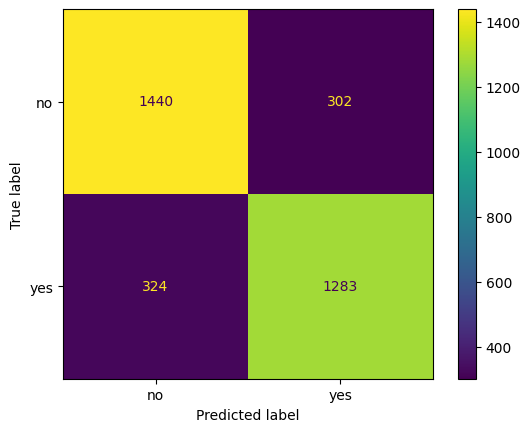

In [20]:

# Confusion matrix for understanding the prediction
# This is comman for all classification Models
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['no','yes'])
print('Classification Report\n:', classification_report(y_test,y_pred))

In [21]:
# looping max_depth (single parameter) to find the best value for it

for num in range(2, 21, 2):
    iter_model = DecisionTreeClassifier(max_depth=num, random_state=42)
    iter_model.fit(x_train, y_train)
    training_score = iter_model.score(x_train, y_train)
    print(f'Training Accuracy for model with max_depth_{num}:', round(training_score*100, 2), '%')
    y_pred = iter_model.predict(x_test)
    print(f'Testing Accuracy for model with max_depth_{num}:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
    print()


Training Accuracy for model with max_depth_2: 72.49 %
Testing Accuracy for model with max_depth_2: 70.56 %

Training Accuracy for model with max_depth_4: 79.34 %
Testing Accuracy for model with max_depth_4: 78.14 %

Training Accuracy for model with max_depth_6: 82.29 %
Testing Accuracy for model with max_depth_6: 80.62 %

Training Accuracy for model with max_depth_8: 85.15 %
Testing Accuracy for model with max_depth_8: 81.31 %

Training Accuracy for model with max_depth_10: 88.76 %
Testing Accuracy for model with max_depth_10: 80.77 %

Training Accuracy for model with max_depth_12: 92.18 %
Testing Accuracy for model with max_depth_12: 80.41 %

Training Accuracy for model with max_depth_14: 95.07 %
Testing Accuracy for model with max_depth_14: 79.37 %

Training Accuracy for model with max_depth_16: 97.24 %
Testing Accuracy for model with max_depth_16: 79.61 %

Training Accuracy for model with max_depth_18: 98.46 %
Testing Accuracy for model with max_depth_18: 78.86 %

Training Accuracy 

# Hyper parameter Tuning

In [22]:
# parameter for grid
params = {#'criterion' : ['gini','entropy', 'log_loss','splitter'],
          'max_depth': [6,7,8,9,10,11,12],
          'min_samples_split': [2,4,6,8],
          'min_samples_leaf': [1,2,3,4]}


In [23]:
# Tuning the model with above combination to find the best parameter

# creating the classifier
dt = DecisionTreeClassifier(random_state=42)

#set up gridsearch
grid_search = GridSearchCV(
                           estimator=dt,
                           param_grid=params,
                           n_jobs=-1,
                           verbose =4)

# fit the model with the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=4)

In [24]:
# Displaying the best parameter and best score
print('Best Params from the gridsearch:',grid_search.best_params_)
print('Score Params from the gridsearch:',round(grid_search.best_score_*100,2),'%')

Best Params from the gridsearch: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}
Score Params from the gridsearch: 81.03 %


In [25]:
# Building the final model with the best parameter from grid search

best_parameters = grid_search.best_params_
final_model = DecisionTreeClassifier(**best_parameters,random_state=42)

# fit the data onto the final model
final_model.fit(x_train, y_train)

# model score
print('Training_Score:', round(final_model.score(x_train,y_train)*100,2),'%')

Training_Score: 84.95 %


In [26]:
# Testing our model

y_pred_final = final_model.predict(x_test)
print('Testing_Score:', round(accuracy_score(y_test,y_pred_final)*100,2),'%')

Testing_Score: 81.22 %


Classification Report
:               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1742
           1       0.81      0.80      0.80      1607

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



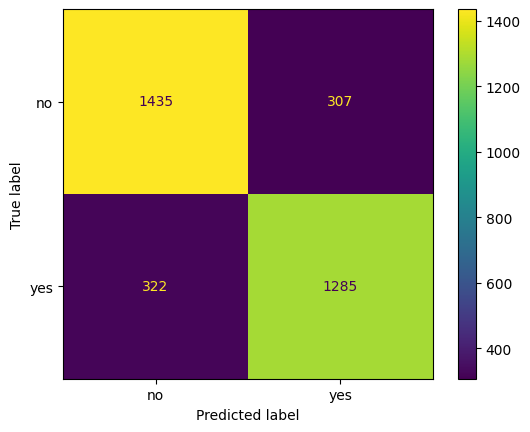

In [27]:
# Detailed metrics
# Confusion matrix for understanding the prediction
# This is comman for all classification Models
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final,display_labels=['no','yes'])
print('Classification Report\n:', classification_report(y_test,y_pred_final))


In [28]:
# Computing the AUC-ROC

fpr,tpr,thr = roc_curve(y_test,y_pred_final)
auc = roc_auc_score(y_test,y_pred_final)
print('Area Under The  roc Curve:', round(auc*100,2),'%')

Area Under The  roc Curve: 81.17 %


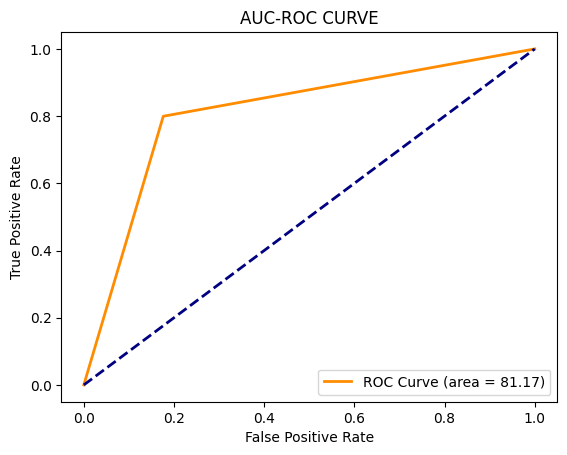

In [29]:

# Plotting the AUC ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {round(auc*100, 2)})')
plt.plot([0,1], [0,1], color='navy', lw=2, ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC CURVE')
plt.legend(loc=4)
plt.show()